In [56]:
import numpy as np
import matplotlib.pyplot as plt

# y = mx+c

In [57]:
np.random.seed(42) 
X = np.random.rand(100, 1) * 10 
true_m = 2.5
true_c = 5
y_true = true_m * X + true_c + np.random.randn(100, 1) * 2 

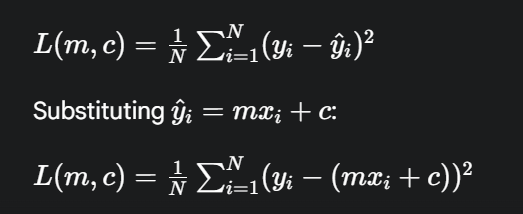

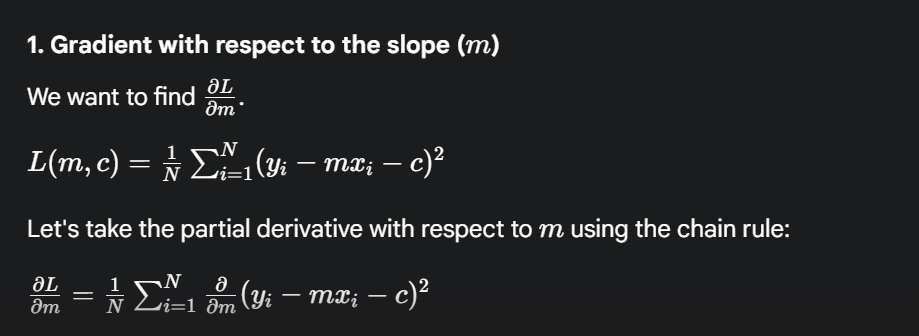

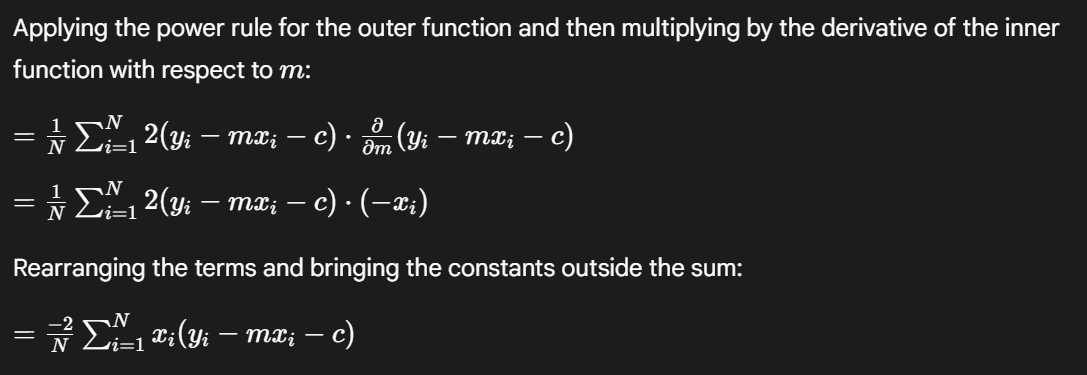

In [58]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)


def compute_gradients(X_data, y_data, m, c):
    number_datapoints = len(X_data)
    y_pred = m * X_data + c 
    error = y_data - y_pred 

    dm = (-2 / number_datapoints) * np.sum(X_data * error)
    dc = (-2 /number_datapoints) * np.sum(error)
    return dm, dc


In [59]:
class GradientDescentOptimizer:
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
    def update(self, params, grads):
        m, c = params
        dm, dc = grads

        m_new = m - self.learning_rate * dm
        c_new = c - self.learning_rate * dc

        return m_new, c_new

In [60]:

def train_with_gd(X, y_true, epochs=500, learning_rate=0.01):

    m = np.random.randn(1, 1) * 0.01
    c = np.random.randn(1, 1) * 0.01 

    gd_optimizer = GradientDescentOptimizer(learning_rate=learning_rate)

    losses = []

    print(f"\n--- Treinando com Gradient Descent (LR: {learning_rate}) ---")
    for epoch in range(epochs):

        y_pred = m * X + c

        loss = mean_squared_error(y_true, y_pred)
        losses.append(loss)

        #backpropagation
        dm, dc = compute_gradients(X, y_true, m, c)

        #Optimização
        m, c = gd_optimizer.update((m, c), (dm, dc))

        if (epoch + 1) % (epochs // 10) == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, m: {m[0,0]:.4f}, c: {c[0,0]:.4f}")

    print("Término do treino!")
    print(f"Final m: {m[0,0]:.4f}, Final c: {c[0,0]:.4f}, Final Loss: {losses[-1]:.4f}")
    return m, c, losses

In [61]:

final_m, final_c, training_losses = train_with_gd(X, y_true, epochs=500, learning_rate=0.01)


--- Treinando com Gradient Descent (LR: 0.01) ---
Epoch 1/500, Loss: 334.1602, m: 1.9960, c: 0.3493
Epoch 50/500, Loss: 7.2254, m: 2.9817, c: 1.6978
Epoch 100/500, Loss: 5.5193, m: 2.8424, c: 2.6040
Epoch 150/500, Loss: 4.5410, m: 2.7370, c: 3.2902
Epoch 200/500, Loss: 3.9801, m: 2.6571, c: 3.8097
Epoch 250/500, Loss: 3.6586, m: 2.5966, c: 4.2032
Epoch 300/500, Loss: 3.4742, m: 2.5509, c: 4.5011
Epoch 350/500, Loss: 3.3684, m: 2.5162, c: 4.7266
Epoch 400/500, Loss: 3.3078, m: 2.4899, c: 4.8975
Epoch 450/500, Loss: 3.2731, m: 2.4700, c: 5.0268
Epoch 500/500, Loss: 3.2531, m: 2.4550, c: 5.1247
Término do treino!
Final m: 2.4550, Final c: 5.1247, Final Loss: 3.2531


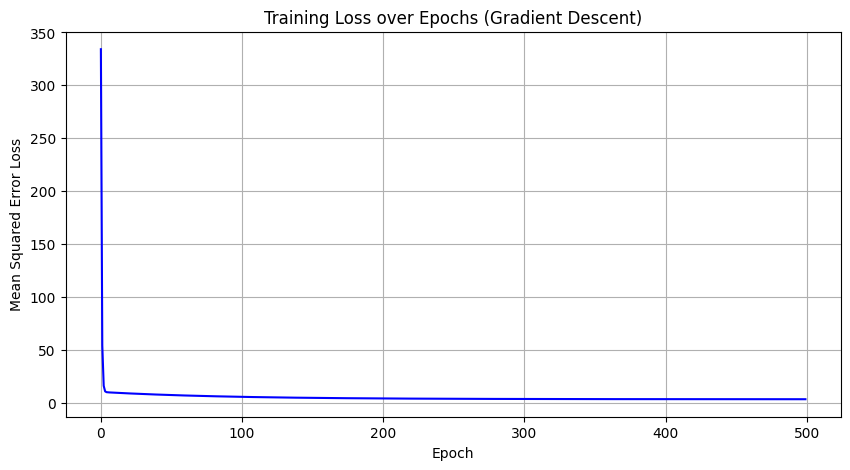

In [62]:


plt.figure(figsize=(10, 5))
plt.plot(training_losses, color='blue')
plt.title('Training Loss over Epochs (Gradient Descent)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.grid(True)
plt.show()


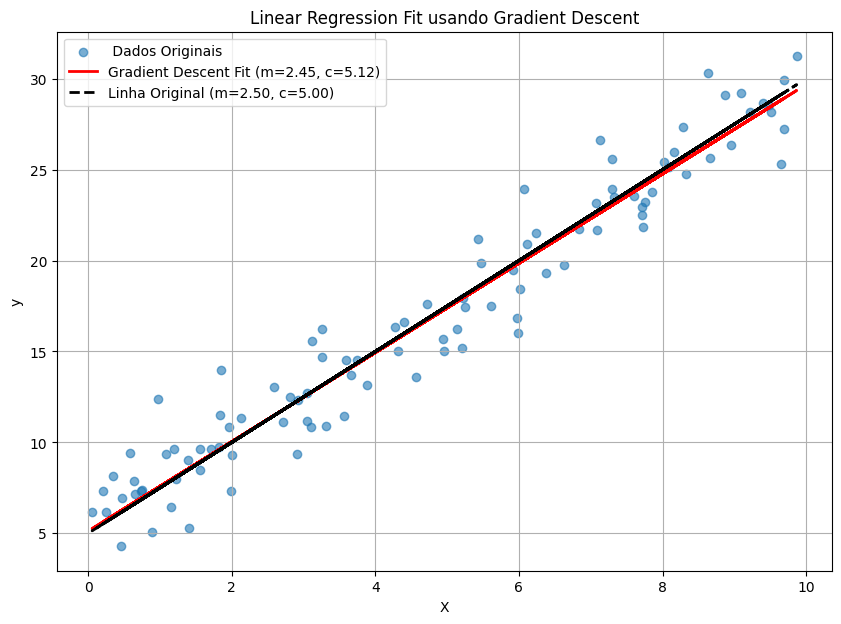

In [64]:

plt.figure(figsize=(10, 7))
plt.scatter(X, y_true, label=' Dados Originais', alpha=0.6)
plt.plot(X, final_m * X + final_c, color='red', linewidth=2, label=f'Gradient Descent Fit (m={final_m[0,0]:.2f}, c={final_c[0,0]:.2f})')
plt.plot(X, true_m * X + true_c, color='black', linestyle='--', linewidth=2, label=f'Linha Original (m={true_m:.2f}, c={true_c:.2f})')

plt.title('Linear Regression Fit usando Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()